In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## What is Customer Segmentation ?
It is a process of segregating customers based on various condition that can help the copmanies focus on targeted marketing, product recommendations and a way to engage specific segment of the customer. <br/>
Because the problem here to to identify certain group unsupervised machine learning algorithms will be used, typically clustering techniques will be employed to segregate the customers.

## Feature Engineering to create Recency, Frequency and Monetary Features
We will generate newer features called Recency (how recntly a customer has brought an item from the store), Frequency (how frequently a customer buys from a store) and Monetary (the amount customer has spent for buying products from the store). The RFM data will be employed to segragate the customers using K-Means Clustering.

In [3]:
data = pd.read_csv('../Dataset/Customer-Segmentation-Data.csv')

## Exploratory Data Analysis

In [4]:
data.shape

(35116, 8)

In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [6]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

##### We need to segregate the customers, for that purpose we need to to identify customers as unique individual. The presence of NaN values doesnt provide the identity of the customer and hence the record is meaningless and needs to be dropped. 

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data['CustomerID'] = data['CustomerID'].apply(int)

In [11]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,33698.000000,33698.000000,33698.000000,33698.000000
mean,559921.120779,14.797110,4.480351,12793.819188
std,12718.848027,31.690705,47.179203,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548374.500000,5.000000,1.250000,12473.000000
50%,561093.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


#### Count of all the country

<Axes: xlabel='count', ylabel='Country'>

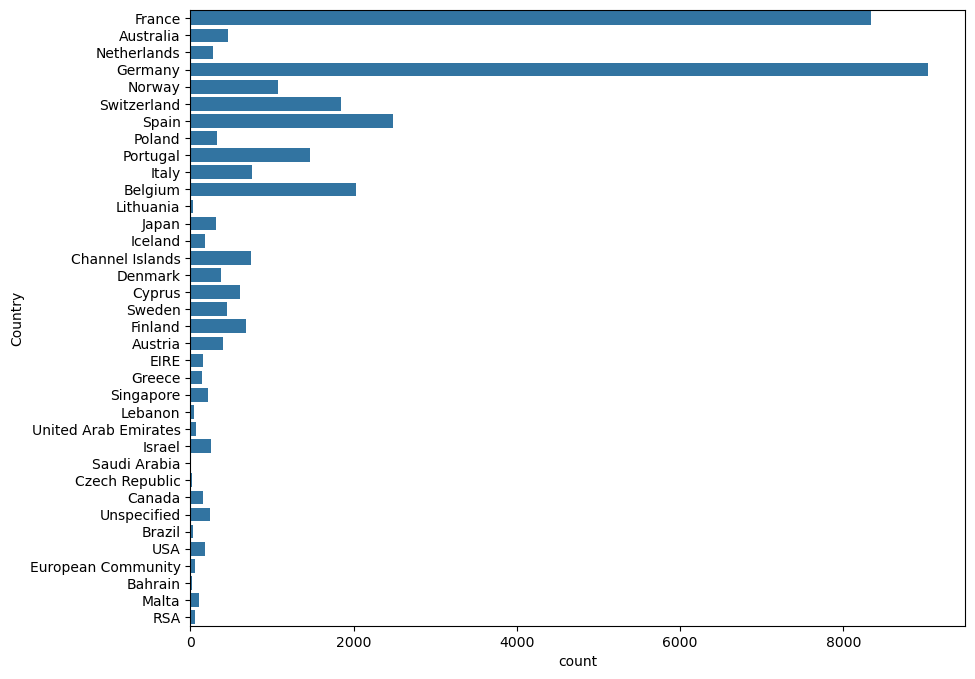

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(y='Country', data=data)

#### Add Sales feature as total sales price for each invoice

In [13]:
data['Sales'] = data.Quantity*data.UnitPrice

In [14]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.00
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.00
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.00
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.20
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.60
...,...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France,10.20
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France,12.60
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France,16.60
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France,16.60


#### Total sales by country

In [15]:
total_sales_by_country = data.groupby(['Country']).Sales.agg({'sum'})

Text(0.5, 1.0, 'Total Sales By Country')

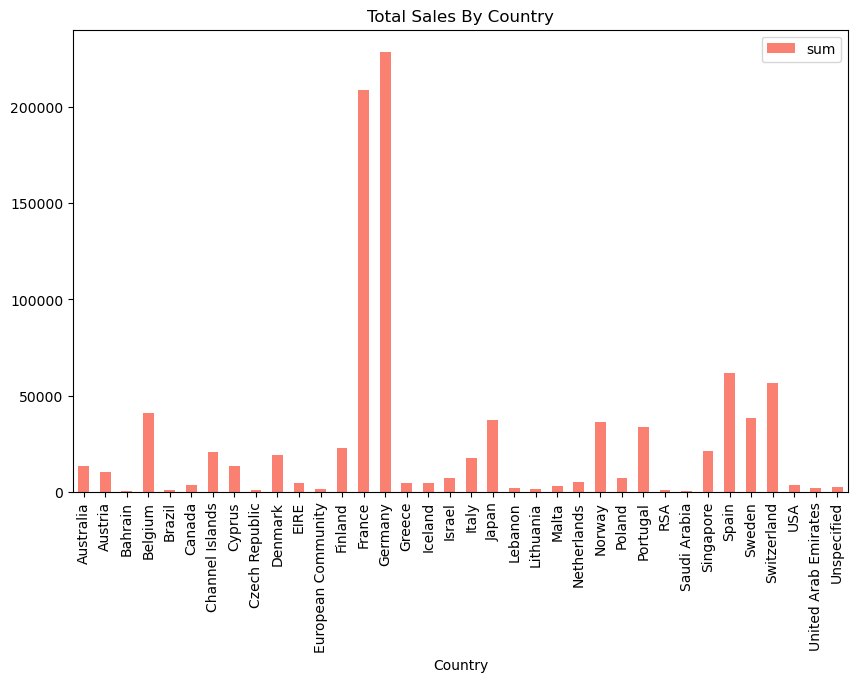

In [16]:
total_sales_by_country.plot(kind='bar', figsize=(10,6),color='salmon')
plt.title('Total Sales By Country')

#### Total no of unique customers

In [17]:
len(data['CustomerID'].unique()) 

414

#### Total no of unique items in store denoted by Stock Code

In [18]:
len(data['StockCode'].unique())

2574

In [145]:
most_sold_items = pd.DataFrame({})
most_sold_items

""


In [146]:
most_sold_items['Counts'] = data['StockCode'].value_counts()

In [147]:
most_sold_items

,Counts
StockCode,
POST,1055
22326,271
22423,222
22554,197
22556,179
...,...
20897,1
20794,1
23136,1


In [148]:
most_sold_items_gteq_50 = most_sold_items[most_sold_items['Counts'] >= 50]

#### Top 20 most sold items

Text(0.5, 1.0, 'Most Sold Items')

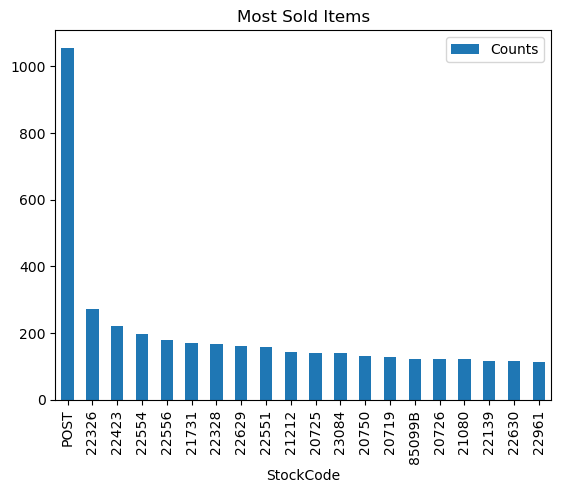

In [149]:
most_sold_items_gteq_50.head(20).plot(kind='bar')
plt.title('Most Sold Items')

#### Most revenue generating items

In [20]:
groupby = data.groupby(['StockCode'])

In [21]:
most_revenue_generating_items = pd.DataFrame({
    'Total_Sales': groupby['Sales'].sum(),
    'Total_Counts': groupby['Sales'].count()
})

In [22]:
most_revenue_generating_items_20 = most_revenue_generating_items.sort_values(by=['Total_Counts'], ascending=False).head(20)

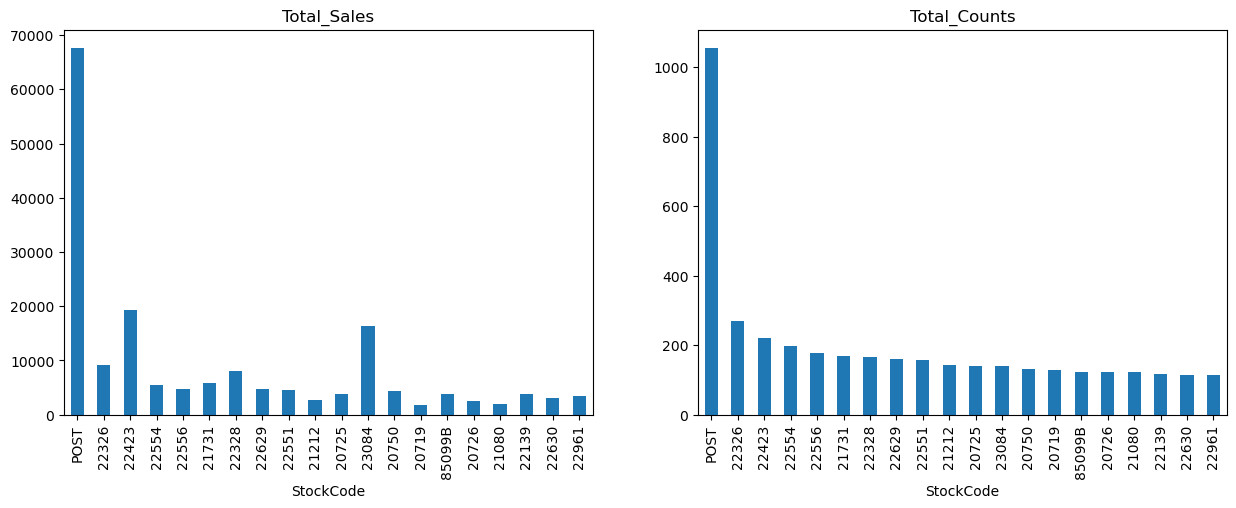

In [23]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
for ax,i in zip(axes.flatten(),['Total_Sales','Total_Counts']):
    most_revenue_generating_items_20[i].head(20).plot(kind='bar',ax=ax)
    ax.set_title(i)

#### No. of invoice generated(no. of times shopped) brought by the customers

In [26]:
invoice_data = pd.DataFrame(data.groupby(['CustomerID']).InvoiceNo.agg(Count='nunique')).sort_values(by='Count',ascending=False)
invoice_data

,Count
CustomerID,
12569,32
12682,31
12471,30
12720,25
12681,22
...,...
12713,1
12715,1
12515,1


#### Customers who shop frequently

Text(0.5, 1.0, 'Customer who shop frequently')

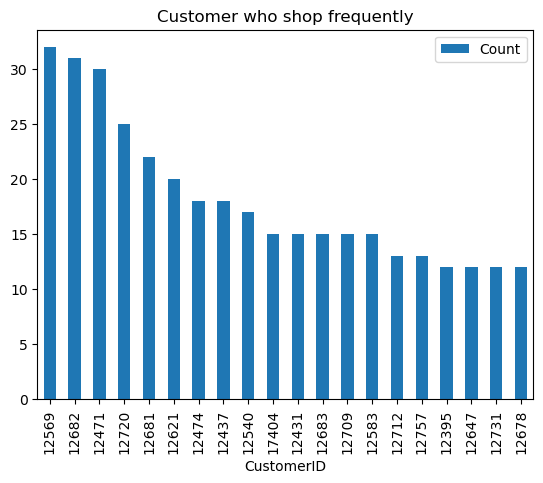

In [29]:
invoice_data.head(20).plot(kind='bar')
plt.title('Customer who shop frequently')

#### Customer who have brought most number of products

In [32]:
product_data = data.groupby('CustomerID').StockCode.agg(total_product='count',total_unique_product='nunique').sort_values(by='total_product', ascending=False)
product_data

,total_product,total_unique_product
CustomerID,,
12681,638,267
12682,525,209
12540,478,277
12621,467,261
12471,460,150
...,...,...
12665,3,3
12814,2,2
12603,2,2


Text(0.5, 1.0, 'Total products brought by the customers')

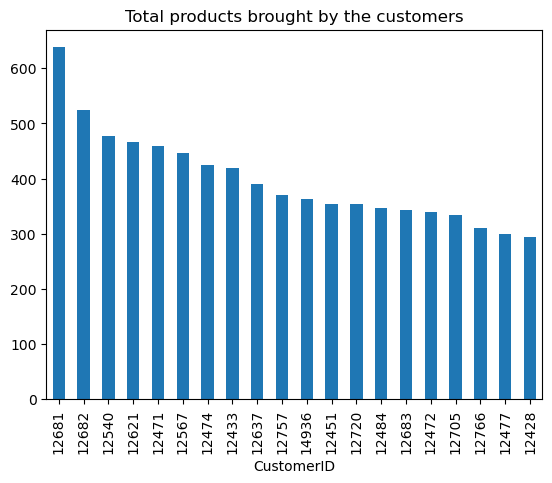

In [33]:
product_data['total_product'].head(20).plot(kind='bar')
plt.title('Total products brought by the customers')

In [40]:
# Aggregate product data
sales_data = data.groupby('CustomerID').Sales.agg(total_product_sales='sum',average_product_value='mean').sort_values(by='total_product_sales', ascending=False)
sales_data

,total_product_sales,average_product_value
CustomerID,,
17404,31906.82,161.145556
12753,21429.39,108.778629
12744,21279.29,95.852658
12471,19824.05,43.095761
12731,18895.91,68.963175
...,...,...
12353,89.00,22.250000
12401,84.30,16.860000
12506,73.50,3.195652


Text(0.5, 1.0, 'Total Sales by the customers')

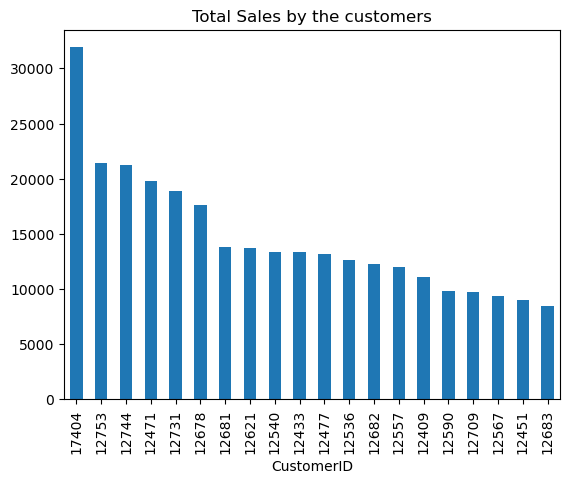

In [42]:
sales_data['total_product_sales'].head(20).plot(kind='bar')
plt.title('Total Sales by the customers')

In [38]:
cart_data = data.groupby(['CustomerID','InvoiceNo']).Sales.agg(cart_value='sum')
cart_data

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
...                          ...
17828      557668          30.00
           563936         213.50
           576897         743.43
17829      543911         889.24
17844      564428          51.56

[1536 rows x 1 columns]

In [158]:
cart_data.reset_index(inplace=True)

In [159]:
cart_data

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
...,...,...,...
1531,17828,557668,30.00
1532,17828,563936,213.50
1533,17828,576897,743.43
1534,17829,543911,889.24


In [160]:
agg_cart_data = cart_data.groupby(['CustomerID']).cart_value.agg(avg_cart_value='mean',min_cart_value='min',max_cart_value='max')
agg_cart_data

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30
...,...,...,...
17444,980.013333,550.94,1217.64
17508,387.310000,387.31,387.31
17828,455.022500,30.00,833.16


In [161]:
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])
customer_df

,Count,total_product,total_unique_product,total_product_sales,average_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30
...,...,...,...,...,...,...,...,...
17444,3,135,132,2940.04,21.778074,980.013333,550.94,1217.64
17508,1,22,22,387.31,17.605000,387.310000,387.31,387.31
17828,4,67,54,1820.09,27.165522,455.022500,30.00,833.16


In [162]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
len(data['StockCode'].unique())

2574

In [163]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['StockCode']])

# Convert the result to a pandas DataFrame for better readability
encoded_df = pd.DataFrame(np.array(encoded_data), columns=encoder.get_feature_names_out())
encoded_df

,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_15039,StockCode_15044A,...,StockCode_90192,StockCode_90201A,StockCode_90201B,StockCode_90201C,StockCode_90201D,StockCode_90202D,StockCode_90204,StockCode_C2,StockCode_M,StockCode_POST
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
encoded_df['CustomerID'] = data['CustomerID']

In [165]:
encoded_df

,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_15039,StockCode_15044A,...,StockCode_90201A,StockCode_90201B,StockCode_90201C,StockCode_90201D,StockCode_90202D,StockCode_90204,StockCode_C2,StockCode_M,StockCode_POST,CustomerID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0
33694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0
33695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0
33696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0


In [166]:
items_data = encoded_df.groupby('CustomerID').sum()
items_data

,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_15039,StockCode_15044A,...,StockCode_90192,StockCode_90201A,StockCode_90201B,StockCode_90201C,StockCode_90201D,StockCode_90202D,StockCode_90204,StockCode_C2,StockCode_M,StockCode_POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
17508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [167]:
items_data.sum()

StockCode_10002       12.0
StockCode_10120        1.0
StockCode_10125       13.0
StockCode_10133        4.0
StockCode_10135        4.0
                     ...  
StockCode_90202D       0.0
StockCode_90204        1.0
StockCode_C2           5.0
StockCode_M           34.0
StockCode_POST      1010.0
Length: 2574, dtype: float64

In [168]:
top_120_items = items_data.sum().sort_values().tail(120).index
top_120_items

Index(['StockCode_23243', 'StockCode_21240', 'StockCode_23389',
       'StockCode_85014B', 'StockCode_22966', 'StockCode_22847',
       'StockCode_23255', 'StockCode_21558', 'StockCode_22558',
       'StockCode_23292',
       ...
       'StockCode_23084', 'StockCode_22551', 'StockCode_22629',
       'StockCode_22328', 'StockCode_21731', 'StockCode_22556',
       'StockCode_22554', 'StockCode_22423', 'StockCode_22326',
       'StockCode_POST'],
      dtype='object', length=120)

In [169]:
top_120_items_data = items_data[top_120_items]
top_120_items_data

,StockCode_23243,StockCode_21240,StockCode_23389,StockCode_85014B,StockCode_22966,StockCode_22847,StockCode_23255,StockCode_21558,StockCode_22558,StockCode_23292,...,StockCode_23084,StockCode_22551,StockCode_22629,StockCode_22328,StockCode_21731,StockCode_22556,StockCode_22554,StockCode_22423,StockCode_22326,StockCode_POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,7.0
12348.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0
17508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0


In [46]:
import datetime

In [47]:
reference_date = data['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M')).max()

In [48]:
reference_date

Timestamp('2011-12-09 12:50:00')

In [49]:
data['Dateobject'] = data['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M'))

In [50]:
data['Days-Since-Last-Purchase'] = (reference_date - data.Dateobject).apply(lambda x : x.days)
data['Days-Since-Last-Purchase']

0        373
1        373
2        373
3        373
4        373
        ... 
35111      0
35112      0
35113      0
35114      0
35115      0
Name: Days-Since-Last-Purchase, Length: 33698, dtype: int64

In [53]:
customer_history_data=data[['CustomerID', 'Days-Since-Last-Purchase']].groupby('CustomerID').min().sort_values(by='Days-Since-Last-Purchase')
customer_history_data

,Days-Since-Last-Purchase
CustomerID,
12526,0
12713,0
12680,0
12518,0
12662,0
...,...
12441,366
12725,370
12686,371


In [54]:
customer_history_data.rename(columns={'Days-Since-Last-Purchase':'Recency'},inplace=True)

In [60]:
customer_frequency_data = data[['CustomerID', 'InvoiceNo']].groupby(['CustomerID','InvoiceNo']).count().reset_index().groupby(['CustomerID']).count().sort_values(by='InvoiceNo')
customer_frequency_data

,InvoiceNo
CustomerID,
12603,1
12586,1
12587,1
12588,1
12591,1
...,...
12681,22
12720,25
12471,30


In [61]:
customer_frequency_data.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)

In [63]:
customer_sales_data = data[['CustomerID','Sales']].groupby(['CustomerID']).sum().sort_values(by='Sales')
customer_sales_data

,Sales
CustomerID,
17844,51.56
12665,63.00
12506,73.50
12401,84.30
12353,89.00
...,...
12731,18895.91
12471,19824.05
12744,21279.29


In [64]:
customer_sales_data.rename(columns={'Sales':'Monetary'}, inplace=True)

In [65]:
RFM_data = customer_history_data.join(customer_frequency_data).join(customer_sales_data)
RFM_data

,Recency,Frequency,Monetary
CustomerID,,,
12526,0,3,1316.66
12713,0,1,848.55
12680,0,4,862.81
12518,0,5,2056.89
12662,0,11,3849.78
...,...,...,...
12441,366,1,173.55
12725,370,1,427.80
12686,371,1,89.14


In [68]:
RFM_data.sort_values(by=['Monetary','Frequency','Recency'], ascending=False)

,Recency,Frequency,Monetary
CustomerID,,,
17404,3,15,31906.82
12753,22,6,21429.39
12744,51,7,21279.29
12471,1,30,19824.05
12731,23,12,18895.91
...,...,...,...
12353,203,1,89.00
12401,302,1,84.30
12506,232,1,73.50


#### Checking the Distribution of the RFM Data

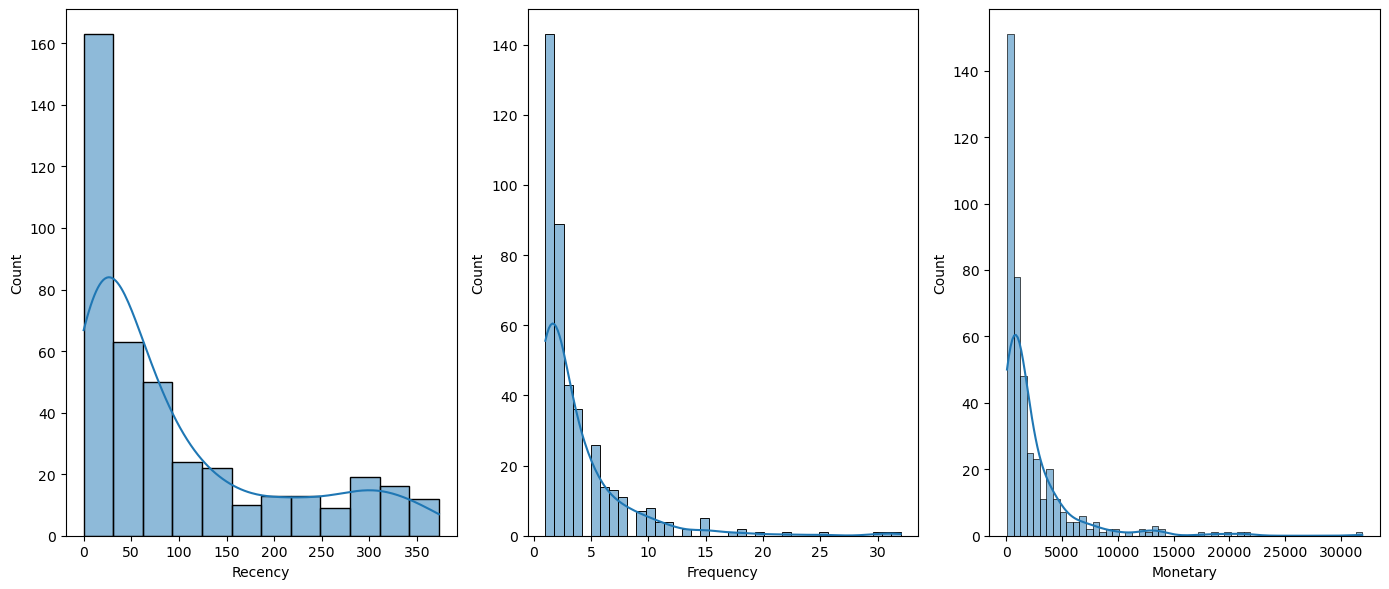

In [69]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.histplot(RFM_data[val], ax=axes[ax],kde=True)
    plt.tight_layout()

#### Checking the Boxplot of the RFM Data for outliers

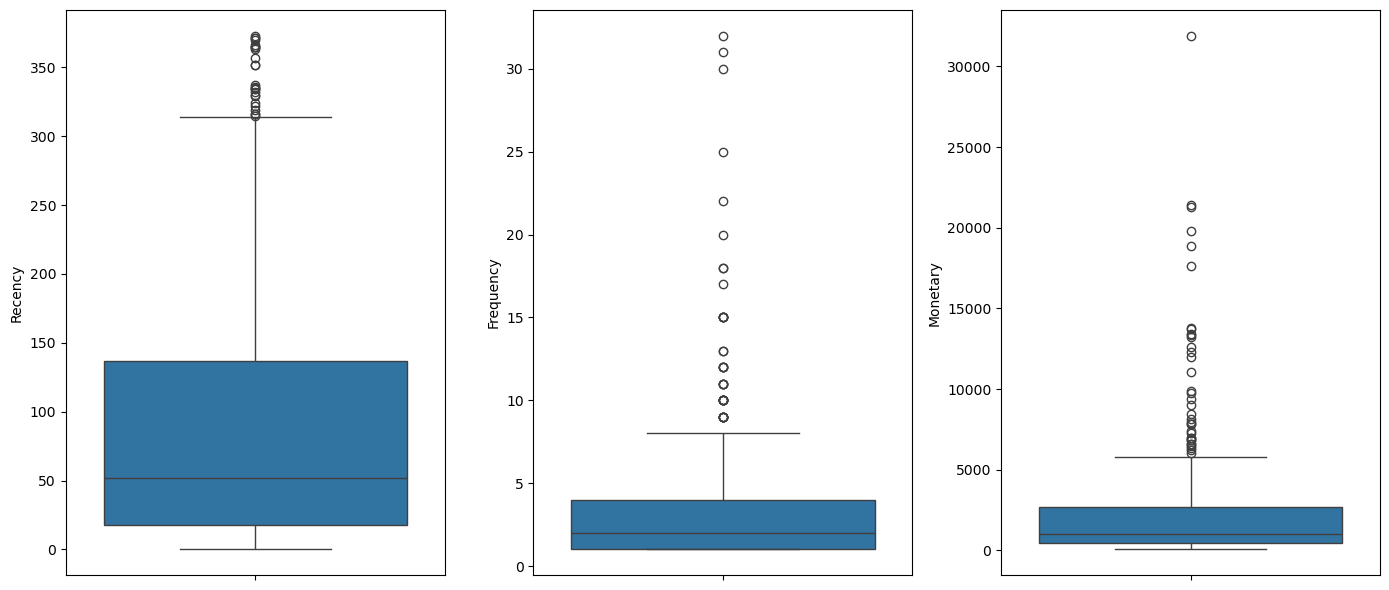

In [70]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.boxplot(RFM_data[val], ax=axes[ax])
    plt.tight_layout()

#### Although there are outliers, we need to understand that there are very few customers who buy, but frequently and provide a greater monetary value to the store, therefore caution must be exercised while treating them as outliers.

However, we are using K-Means algorithm for the purpose of clustering, the centroids are calculated by averaging all the data point in a cluster, and hence is sensitive to outliers. So removing the outliers here is necessary

### Removing the outliers by idenitifying the IQR(interquatile range)

In [76]:
M_Q1 = RFM_data['Monetary'].quantile(0.25)
M_Q3 = RFM_data['Monetary'].quantile(0.75)

print(M_Q1,M_Q3)
M_IQR = M_Q3-M_Q1
monetary_outliers_data = RFM_data[(RFM_data['Monetary'] > (M_Q3 + (1.5*M_IQR)))]
monetary_outliers_data

459.65 2659.9624999999996


,Recency,Frequency,Monetary
CustomerID,,,
12433,0,7,13375.87
12471,1,30,19824.05
12621,1,20,13689.67
12583,2,15,7281.38
12766,3,7,6989.63
12682,3,31,12288.22
12683,3,15,8476.57
17404,3,15,31906.82
12798,9,3,6977.04


In [77]:
F_Q1 = RFM_data['Frequency'].quantile(0.25)
F_Q3 = RFM_data['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1
frequency_outliers_data = RFM_data[(RFM_data['Frequency'] > (F_Q3 + (1.5*F_IQR)))]
frequency_outliers_data

,Recency,Frequency,Monetary
CustomerID,,,
12662,0,11,3849.78
12471,1,30,19824.05
12621,1,20,13689.67
12437,1,18,4951.41
12569,1,32,4124.69
12417,2,9,3649.10
12720,2,25,5781.73
12583,2,15,7281.38
12362,2,10,5226.23


In [78]:
R_Q1 = RFM_data['Recency'].quantile(0.25)
R_Q3 = RFM_data['Recency'].quantile(0.75)
R_IQR = F_Q3-F_Q1
recency_outliers_data = RFM_data[(RFM_data['Recency'] > (R_Q3 + (1.5*R_IQR)))]
recency_outliers_data

,Recency,Frequency,Monetary
CustomerID,,,
12521,142,1,599.68
12510,142,2,982.57
17444,147,3,2940.04
12815,147,2,1063.46
12405,148,1,1710.39
...,...,...,...
12441,366,1,173.55
12725,370,1,427.80
12686,371,1,89.14


### RFM non outliers data

In [79]:
non_outlier_data = RFM_data[(~RFM_data.index.isin(monetary_outliers_data.index))&(~RFM_data.index.isin(frequency_outliers_data.index))&(~RFM_data.index.isin(recency_outliers_data.index))]
non_outlier_data

,Recency,Frequency,Monetary
CustomerID,,,
12526,0,3,1316.66
12713,0,1,848.55
12680,0,4,862.81
12518,0,5,2056.89
12423,0,8,1859.31
...,...,...,...
12453,133,1,707.09
12743,133,2,546.43
13492,135,3,1269.84


In [80]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,414.000000,414.000000,414.000000
mean,95.405797,3.710145,2262.538913
std,104.638705,4.255524,3479.689136
min,0.000000,1.000000,51.560000
25%,18.000000,1.000000,459.650000
50%,52.000000,2.000000,1025.700000
75%,136.500000,4.000000,2659.962500
max,373.000000,32.000000,31906.820000


In [81]:
non_outlier_data.describe()

,Recency,Frequency,Monetary
count,257.000000,257.000000,257.000000
mean,46.474708,2.929961,1446.311868
std,37.247592,1.933200,1253.027196
min,0.000000,1.000000,51.560000
25%,16.000000,1.000000,530.180000
50%,36.000000,2.000000,1002.310000
75%,72.000000,4.000000,1970.600000
max,141.000000,8.000000,5568.350000


### Distribution of the non outliers data

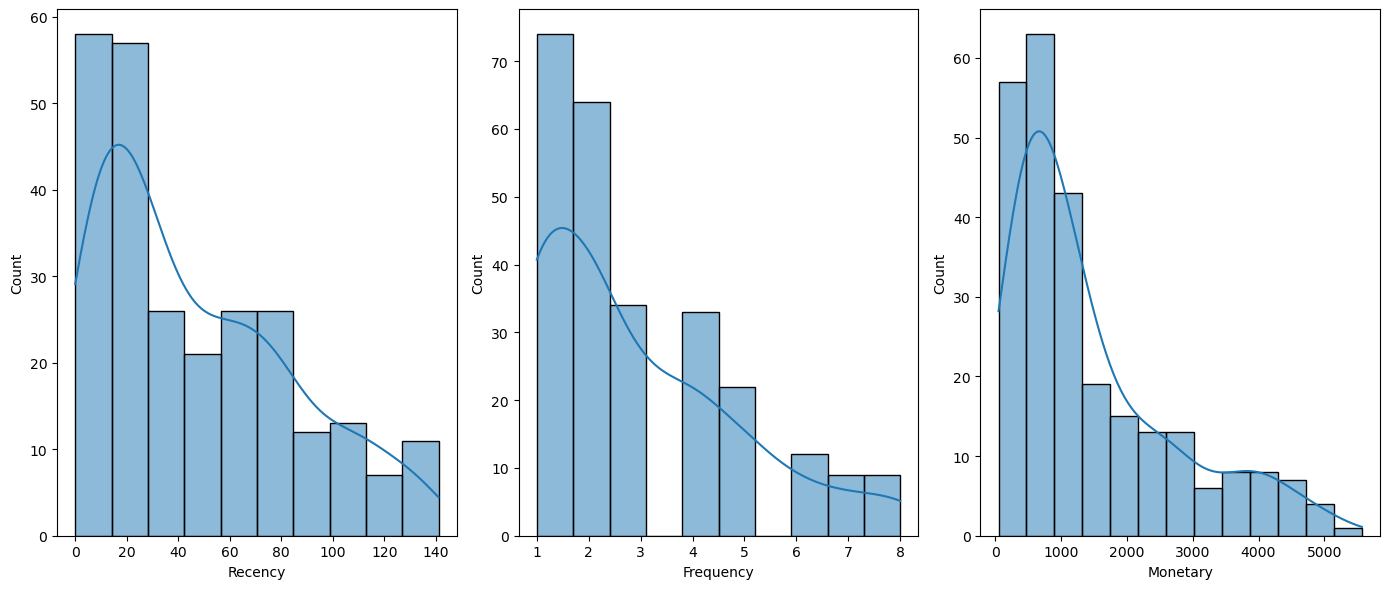

In [83]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.histplot(non_outlier_data[val],kde=True, ax=axes[ax])
    plt.tight_layout()

### Boxplot of the non outliers data

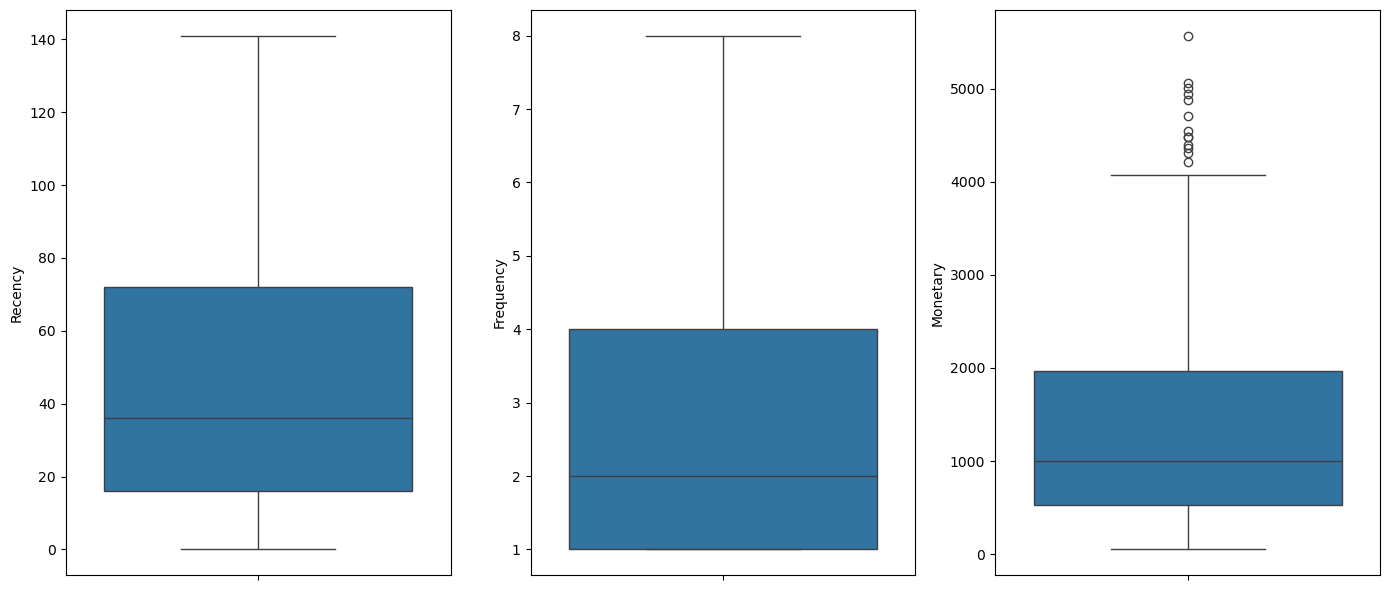

In [82]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.boxplot(non_outlier_data[val], ax=axes[ax])
    plt.tight_layout()

In [84]:
print(RFM_data.isna().sum())

Recency      0
Frequency    0
Monetary     0
dtype: int64


In [85]:
print('-----------------------Skewness-----------------------')
print(RFM_data.skew())
print('-----------------------Kurtosis-----------------------')
print(RFM_data.kurt())

-----------------------Skewness-----------------------
Recency      1.235287
Frequency    3.261697
Monetary     3.881937
dtype: float64
-----------------------Kurtosis-----------------------
Recency       0.282715
Frequency    14.460086
Monetary     20.557056
dtype: float64


In [86]:
print('-----------------------Skewness-----------------------')
print(non_outlier_data.skew())
print('-----------------------Kurtosis-----------------------')
print(non_outlier_data.kurt())

-----------------------Skewness-----------------------
Recency      0.718722
Frequency    0.969453
Monetary     1.259887
dtype: float64
-----------------------Kurtosis-----------------------
Recency     -0.500368
Frequency    0.115116
Monetary     0.725743
dtype: float64


Text(0.5, 0.92, '3D Scatter Plot of RFM Data')

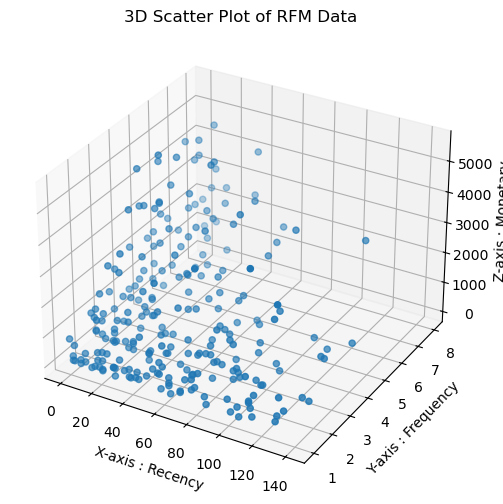

In [93]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example: Creating a 3D scatter plot
ax.scatter(non_outlier_data['Recency'],non_outlier_data['Frequency'], non_outlier_data['Monetary'], cmap='viridis')
ax.set_xlabel('X-axis : Recency')
ax.set_ylabel('Y-axis : Frequency')
ax.set_zlabel('Z-axis : Monetary')
plt.title('3D Scatter Plot of RFM Data')

##### Customers who buy more recently and more frequently provide more monetary value

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
non_outlier_data

,Recency,Frequency,Monetary
CustomerID,,,
12526,0,3,1316.66
12713,0,1,848.55
12680,0,4,862.81
12518,0,5,2056.89
12423,0,8,1859.31
...,...,...,...
12453,133,1,707.09
12743,133,2,546.43
13492,135,3,1269.84


In [96]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outlier_data)

In [97]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outlier_data.index,columns=['Recency','Frequency','Monetary'])
scaled_data_df

,Recency,Frequency,Monetary
CustomerID,,,
12526,-1.250158,0.036300,-0.103673
12713,-1.250158,-1.000272,-0.477985
12680,-1.250158,0.554587,-0.466582
12518,-1.250158,1.072873,0.488233
12423,-1.250158,2.627732,0.330243
...,...,...,...
12453,2.327509,-1.000272,-0.591100
12743,2.327509,-0.481986,-0.719568
13492,2.381309,0.036300,-0.141111


#### Plot after scaling the data

Text(0.5, 0.92, '3D Scatter Plot of RFM Data')

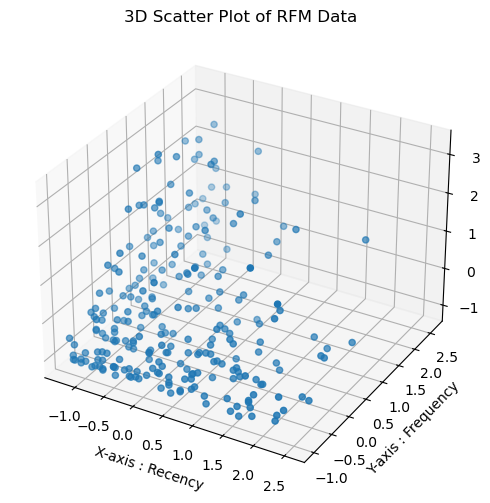

In [98]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example: Creating a 3D scatter plot
ax.scatter(scaled_data_df['Recency'],scaled_data_df['Frequency'], scaled_data_df['Monetary'], cmap='viridis')
ax.set_xlabel('X-axis : Recency')
ax.set_ylabel('Y-axis : Frequency')
ax.set_zlabel('Z-axis : Monetary')
plt.title('3D Scatter Plot of RFM Data')

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Info on Inertia and Sihouette score

**Inertia** - is an evaluation metric that tells us how well a dataset has been clustered based on the distance. It is calcualted by measuring the distance betwwen the data point in the cluster and the centroid, squaring them and then summing all the distance within that cluster, the sum is the intracluster distance. The **lower the sum the better because it shows compactness of the cluster**.

**Elbow Method** - We graphically observe and determine the best k value for a plot of no. of clusters vs inertia.

**Silhouette Score**
$\begin{align}
\frac{b-a}{max(a,b)}
\end{align}$
a= mean intra-cluster distance, b = mean nearest cluster distance 

**Silhouette Score** range from -1 to 1 </br>
* Score near to 1, the samples are well clusteredm clusters are compact and well separated from another cluster
* Score near to 0, the samples are very close to the decision bounday between the 2 clusters, indicating overlapping clusters
* Negative Values, the samples might have been assigned wrong clusters. 

### The goal here is to find the best value of k for clustering 

In [115]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = [i for i in range(2,max_k + 1)]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123, init='k-means++',max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

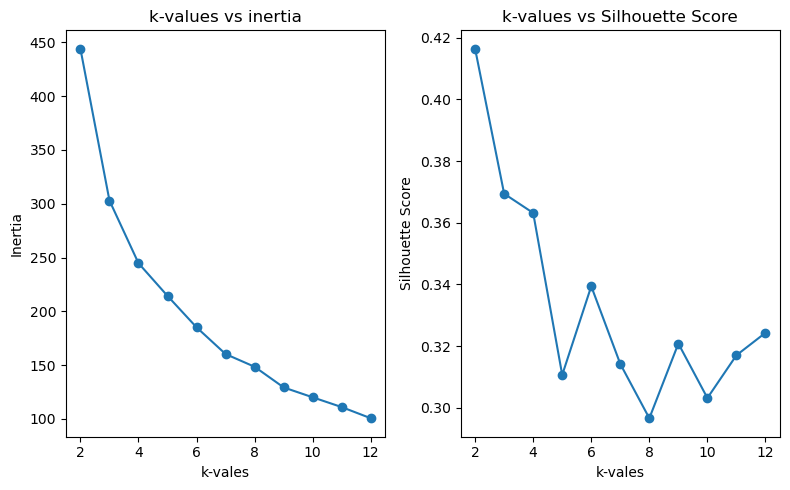

In [116]:

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('k-vales')
plt.ylabel('Inertia')
plt.title('k-values vs inertia')

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('k-vales')
plt.ylabel('Silhouette Score')
plt.title('k-values vs Silhouette Score')
plt.tight_layout()

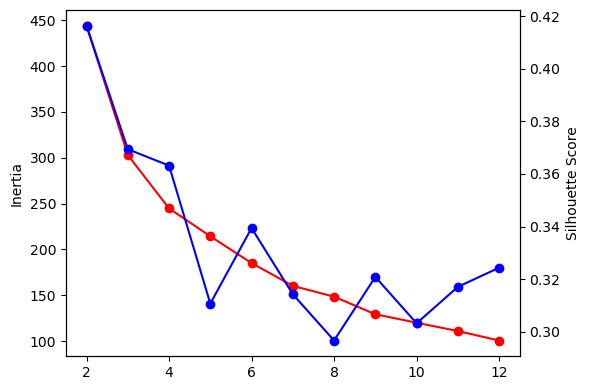

In [117]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()

ax1.plot(k_values, inertia,'r', marker='o')
ax1.set_ylabel("Inertia")

ax2.plot(k_values, silhouette_scores,'b', marker='o');
ax2.set_ylabel("Silhouette Score")

plt.tight_layout()

Inertia decreases with larger k values but so does the silhouette score. Drastic fall of the silhouette score occurs when moving from k=4 to k=5. Therefore more no of clusters doesnt give us a better or well separated clusters. Hence we fix the no. of clusters at n = 4

In [118]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=100,max_iter=1000)
cluster_lables = kmeans.fit_predict(scaled_data_df)

In [119]:
cluster_lables

array([0, 0, 3, 3, 3, 3, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 0, 2, 2, 0, 0, 3, 2, 2, 2, 0, 3, 0, 0, 0,
       3, 2, 3, 0, 0, 2, 2, 0, 3, 2, 2, 2, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 3, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 0, 2, 3, 0, 3, 0, 3, 0, 0, 2, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0,
       0, 0, 3, 0, 2, 2, 0, 1, 0, 1, 0, 2, 3, 0, 0, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [120]:
non_outlier_data['Clusters'] = cluster_lables

In [121]:
non_outlier_data

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12526,0,3,1316.66,0
12713,0,1,848.55,0
12680,0,4,862.81,3
12518,0,5,2056.89,3
12423,0,8,1859.31,3
...,...,...,...,...
12453,133,1,707.09,1
12743,133,2,546.43,1
13492,135,3,1269.84,1


In [122]:
cluster_colors = {
    0:'red',
    1:'blue',
    2:'green',
    3:'rebeccapurple'
}
colors = non_outlier_data['Clusters'].map(cluster_colors)

Text(0.5, 0.92, '3D Scatter Plot of RFM Data')

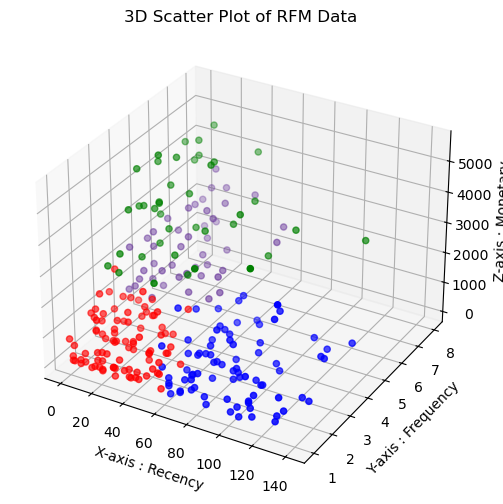

In [123]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example: Creating a 3D scatter plot
ax.scatter(non_outlier_data['Recency'],non_outlier_data['Frequency'], non_outlier_data['Monetary'], c=colors)
ax.set_xlabel('X-axis : Recency')
ax.set_ylabel('Y-axis : Frequency')
ax.set_zlabel('Z-axis : Monetary')
plt.title('3D Scatter Plot of RFM Data')

#### From the above segmentation we can observer the following